In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
y = df['Outcome']
X = df.drop('Outcome',axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=17)

# Min Max Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
for col in X.columns:
    X_train[col] = min_max_scaler.fit_transform(np.array(X_train[col]).reshape(-1,1)) #Fitting and Transforming over train data
    X_test[col] = min_max_scaler.transform(np.array(X_test[col]).reshape(-1,1)) # Only Transforming over test data


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

# Fitting SVM Plane

In [13]:
from sklearn.svm import SVC
svc = SVC(C=1.0, kernel='rbf', degree=3, gamma=5, coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=17)
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf', max_iter=-1,
    probability=True, random_state=17, shrinking=True, tol=0.001,
    verbose=False)

In [14]:
y_pred = svc.predict(X_test)

In [15]:
output = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
output

,Actual,Predicted
649,0,0
516,1,1
151,0,0
381,0,0
325,0,0
473,0,1
736,0,0
300,1,1
662,1,1
484,1,1


# Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve,f1_score
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[87, 10],
       [28, 29]], dtype=int64)

In [17]:
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))
print("F-1Score:", f1_score(y_test,y_pred))

Accuracy: 0.7532467532467533
Precision: 0.7435897435897436
Recall: 0.5087719298245614
F-1Score: 0.6041666666666666


# ROC Curve

In [18]:
y_pred_proba = svc.predict_proba(X_test)[:,1]
y_pred_proba

array([0.16143894, 0.79315892, 0.21724102, 0.13512162, 0.33813256,
       0.49481107, 0.14414276, 0.83459302, 0.75263214, 0.80666848,
       0.50958305, 0.82723774, 0.10284375, 0.37120245, 0.11788264,
       0.14606573, 0.68172109, 0.13973265, 0.18263334, 0.17655942,
       0.80127828, 0.15648442, 0.13457477, 0.90889555, 0.28120622,
       0.21589875, 0.91549773, 0.17950578, 0.53385295, 0.2695126 ,
       0.54365284, 0.341412  , 0.12059298, 0.12389725, 0.16794443,
       0.12608579, 0.81807194, 0.34073174, 0.08345932, 0.73204822,
       0.10756098, 0.128897  , 0.22422165, 0.53829709, 0.08074843,
       0.34471696, 0.86578067, 0.2065406 , 0.82683761, 0.45827434,
       0.26230163, 0.10219796, 0.39817165, 0.39571802, 0.33773448,
       0.75421176, 0.22708865, 0.192141  , 0.36775621, 0.11845461,
       0.17787465, 0.26776641, 0.1809315 , 0.8470246 , 0.46274233,
       0.10954537, 0.25282936, 0.25023825, 0.41806741, 0.19013455,
       0.8198455 , 0.10513264, 0.16685174, 0.07946855, 0.09986

In [19]:
fpr,tpr,thresold = roc_curve(y_test,y_pred_proba)
auc = roc_auc_score(y_test,y_pred_proba)

print("FPR:",fpr)
print('\n')
print("TPR:",tpr)
print('\n')
print("Thresold:",thresold)
print('\n')
print("AUC:",auc)

FPR: [0.         0.         0.         0.01030928 0.01030928 0.03092784
 0.03092784 0.04123711 0.04123711 0.06185567 0.06185567 0.07216495
 0.07216495 0.10309278 0.10309278 0.11340206 0.11340206 0.12371134
 0.12371134 0.13402062 0.13402062 0.16494845 0.16494845 0.19587629
 0.19587629 0.20618557 0.20618557 0.21649485 0.21649485 0.22680412
 0.22680412 0.24742268 0.24742268 0.27835052 0.27835052 0.31958763
 0.31958763 0.32989691 0.32989691 0.35051546 0.35051546 0.36082474
 0.36082474 0.3814433  0.3814433  0.44329897 0.44329897 0.45360825
 0.45360825 0.49484536 0.49484536 0.56701031 0.56701031 1.        ]


TPR: [0.         0.01754386 0.15789474 0.15789474 0.22807018 0.22807018
 0.35087719 0.35087719 0.45614035 0.45614035 0.47368421 0.47368421
 0.50877193 0.50877193 0.52631579 0.52631579 0.54385965 0.54385965
 0.57894737 0.57894737 0.61403509 0.61403509 0.66666667 0.66666667
 0.68421053 0.68421053 0.70175439 0.70175439 0.71929825 0.71929825
 0.73684211 0.73684211 0.77192982 0.77192982 0.80

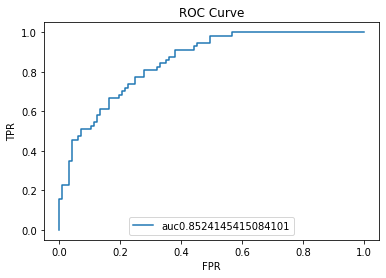

In [21]:
from matplotlib import pyplot as plt 

plt.plot(fpr,tpr,label="auc"+str(auc))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend(loc=8)
#plt.show()